In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


In [154]:
data = pd.read_csv('training_data/training_data.csv')
data = data[(data['G_home'] >= 25) & (data['G_away'] >= 25)]
features = [x for x in list(data) if 'W/L%' in x or 'ORtg' in x or 'DRtg' in x or 'Streak' in x]
X = np.array(data[features])
y = np.array(data[['W_home', 'PTS_diff']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.01)

In [155]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [156]:
y_test, y_diff_test = y_test[:,0], y_test[:,1]
y_train, y_diff_train = y_train[:,0], y_train[:,1]

In [157]:
model = Sequential()
model.add(Dense(64, activation = 'relu', input_shape = (X.shape[1],)))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1,  activation = 'sigmoid'))

In [158]:
# Compile the model
model.compile(loss      = 'binary_crossentropy',
              optimizer = 'adam',
              metrics   = ['accuracy']
              )

In [159]:
model.fit(X_train, y_train, validation_split = 0.2, epochs = 10, batch_size = 32)

Epoch 1/10
263/263 [==============================] - 0s 1ms/step - loss: 0.6309 - accuracy: 0.6439 - val_loss: 0.6082 - val_accuracy: 0.6751
Epoch 2/10
263/263 [==============================] - 0s 706us/step - loss: 0.6130 - accuracy: 0.6602 - val_loss: 0.6068 - val_accuracy: 0.6732
Epoch 3/10
263/263 [==============================] - 0s 694us/step - loss: 0.6077 - accuracy: 0.6667 - val_loss: 0.6080 - val_accuracy: 0.6755
Epoch 4/10
263/263 [==============================] - 0s 697us/step - loss: 0.6049 - accuracy: 0.6714 - val_loss: 0.6129 - val_accuracy: 0.6613
Epoch 5/10
263/263 [==============================] - 0s 699us/step - loss: 0.6015 - accuracy: 0.6726 - val_loss: 0.6165 - val_accuracy: 0.6637
Epoch 6/10
263/263 [==============================] - 0s 689us/step - loss: 0.5978 - accuracy: 0.6761 - val_loss: 0.6116 - val_accuracy: 0.6684
Epoch 7/10
263/263 [==============================] - 0s 680us/step - loss: 0.5956 - accuracy: 0.6771 - val_loss: 0.6121 - val_accuracy: 0

In [164]:
y_pred = model.predict(X_train)

329/329 [==============================] - 0s 346us/step


In [165]:
accuracy_score(y_train, np.round(y_pred))

0.6887133612485725

In [166]:
diff_losses = y_pred[y_train == 0.0]
diff_wins =   y_pred[y_train == 1.0]

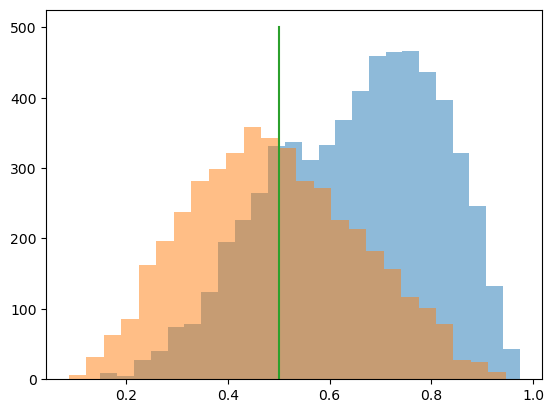

In [170]:
plt.hist(diff_wins, bins = 25, alpha = 0.5)
plt.hist(diff_losses, bins = 25, alpha = 0.5)
plt.plot([0.5, 0.5], [0, 500])